# Series de Tiempo 

**Actividad 8**

Alicia Christyna Martínez Parra

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from utils import path_loader as p

In [59]:
# Load csv file
try:
    df = pd.read_csv(p.generate_file_path(
        file_name='avocado_prices_processed', file_extension='csv', directory='output'))

    n_row, n_col = df.shape
    print(f'CSV File loaded succesfully!\nThere are {n_row} rows and {n_col} columns')
except Exception as e:
    print(f'Something wrong happended!: {e}')

CSV File loaded succesfully!
There are 18249 rows and 13 columns


In [60]:
# Ensure 'date' column is in datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime, handling errors
    if df['date'].isna().any():
        raise ValueError("Some dates could not be converted. Check the 'date' column for invalid values.")
    df.sort_values(by='date', inplace=True)  # Sort by date
else:
    raise ValueError("The dataset must have a 'date' column for time series forecasting.")

In [61]:
# Feature Engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day_of_week'] = df['date'].dt.dayofweek
df['lag_1'] = df['average_price'].shift(1)
df['lag_7'] = df['average_price'].shift(7)

# Drop rows with NaN values created by lagging
df.dropna(inplace=True)

In [62]:
# Features and target
X = df[['year', 'month', 'week', 'day_of_week', 'lag_1', 'lag_7']]
y = df['average_price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the Model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Training RMSE: 0.39
Testing RMSE: 0.38
R^2 Score: 0.05


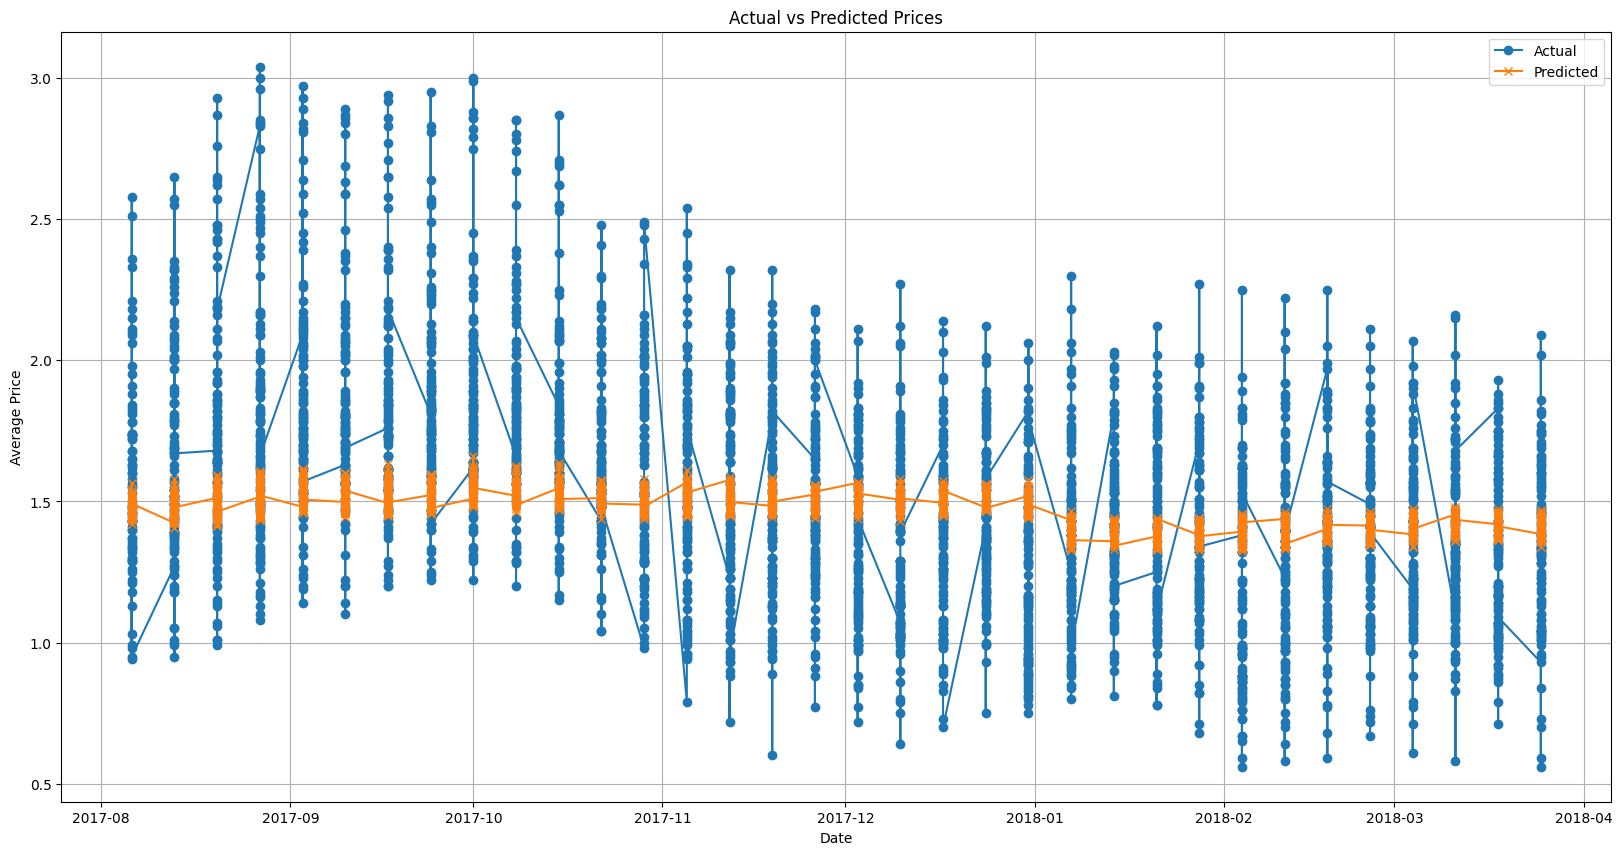

In [66]:
# Plot Actual vs Predicted
plt.figure(figsize=(20, 10))
plt.plot(df['date'].iloc[-len(y_test):], y_test, label='Actual', marker='o')
plt.plot(df['date'].iloc[-len(y_test):], y_pred_test, label='Predicted', marker='x')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Forecasting Future Data
future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=30)
future_df = pd.DataFrame({'date': future_dates})
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['week'] = future_df['date'].dt.isocalendar().week
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['lag_1'] = y.iloc[-1]
future_df['lag_7'] = y.iloc[-7]

future_predictions = model.predict(future_df[['year', 'month', 'week', 'day_of_week', 'lag_1', 'lag_7']])

# Display future predictions
future_df['predicted_price'] = future_predictions
future_df.head()

,date,year,month,week,day_of_week,lag_1,lag_7,predicted_price
0,2018-03-26,2018,3,13,0,1.34,1.32,1.408675
1,2018-03-27,2018,3,13,1,1.34,1.32,1.408675
2,2018-03-28,2018,3,13,2,1.34,1.32,1.408675
3,2018-03-29,2018,3,13,3,1.34,1.32,1.408675
4,2018-03-30,2018,3,13,4,1.34,1.32,1.408675
